<a href="https://www.kaggle.com/code/hosen42/image-similarity-face-detection-car-number-plate?scriptVersionId=123289276" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Image Similarity, Face Detection, Car Number Plate Detection, Average Blur, Gaussian Blur, Media Blur 

**Image Similarity**

Image similarity is becoming popular in recent times. The ability of an image similarity model to find identical images with the utmost accuracy in defined data sets is helping in many ways. Finding plagiarized photos, identifying fake accounts, discovering original images of people, products, and places are a few of the image similarity real-world applications. Image similarity is often concluded as the same as image classification by many.

In [1]:
#SSIM -> Structural similarity index
# MSE -> Mean squared error
# RMS -> Root-mean-square
from skimage.metrics import structural_similarity as ssim
import numpy as np
import cv2

In [2]:
""" 
 error = np.sum((image01.astype("float") - image02.astype("float"))**2)
    error = error/float(image01.shape[0] * image02.shape[1])
    return error

"""

' \n error = np.sum((image01.astype("float") - image02.astype("float"))**2)\n    error = error/float(image01.shape[0] * image02.shape[1])\n    return error\n\n'

**Mean squared error** : The mean square error is the average of the square of the difference between the observed and predicted values of a variable

In [3]:
def mean_squred_error(image01, image02):
    
    """ 
 error = np.sum((image01.astype("float") - image02.astype("float"))**2)
    error = error/float(image01.shape[0] * image02.shape[1])
    return error

"""
    
    error = np.sum((image01.astype("float") - image02.astype("float"))**2)
    error = error/float(image01.shape[0] * image02.shape[1])
    return error

def image_comparision(image01, image02):
    m = mean_squred_error(image01, image02)
    s = ssim(image01, image02)
    print("Mean Squared Error is {}\nStructural Similarity Index Measure is: {}".format(m, s))

In [4]:
image01 = cv2.imread("/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.1.jpg")
image02 = cv2.imread("/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.10.jpg")

In [5]:
image01 = cv2.cvtColor(image01, cv2.COLOR_BGR2GRAY)
image02 = cv2.cvtColor(image02, cv2.COLOR_BGR2GRAY)

In [6]:
image_comparision(image02, image02)

Mean Squared Error is 0.0
Structural Similarity Index Measure is: 1.0


In [7]:
image02.shape

(499, 489)

In [8]:
tuple(np.array(image02.shape[1::-1])/2)

(244.5, 249.5)

In [9]:
image_angle = 45
image_center = tuple(np.array(image02.shape[1::-1])/2)
image_rotation = cv2.getRotationMatrix2D(image_center, image_angle, 1.0)
imageWrap = cv2.warpAffine(image02, image_rotation, image02.shape[1::-1], flags = cv2.INTER_LINEAR)

In [10]:
imageWrap[230]

array([ 35,  38,  45,  50,  57,  57,  57,  63,  67,  69,  72,  76,  79,
        82,  91,  92, 103, 117, 115, 106, 105, 113, 118, 116, 111, 108,
       109, 125, 137, 142, 136, 132, 136, 148, 161, 161, 148, 152, 153,
       152, 152, 150, 139, 129, 127, 131, 127, 123, 126, 133, 115, 103,
       108, 112, 103,  97, 102, 106, 108, 106, 100,  99, 104, 109, 119,
       134, 136, 129, 117, 108,  99,  98,  96,  99, 104, 113, 117, 116,
       108, 101, 101, 105, 118, 126, 132, 134, 134, 135, 139, 141, 147,
       143, 141, 144, 140, 136, 123, 111,  99,  91,  88,  94, 103, 113,
       121, 111, 102,  95,  92,  93,  96, 103, 110, 114, 116, 117, 118,
       123, 123, 121, 125, 132, 126, 119, 117, 121, 114, 122, 124, 126,
       135, 145, 152, 155, 157, 163, 173, 184, 194, 195, 194, 189, 183,
       180, 181, 180, 175, 171, 178, 187, 186, 185, 188, 189, 189, 188,
       186, 185, 190, 196, 200, 202, 205, 208, 208, 207, 205, 205, 206,
       207, 209, 208, 205, 204, 203, 203, 205, 206, 207, 205, 20

In [11]:
cv2.imwrite("../working/AugmentedImage.jpg",imageWrap)

True

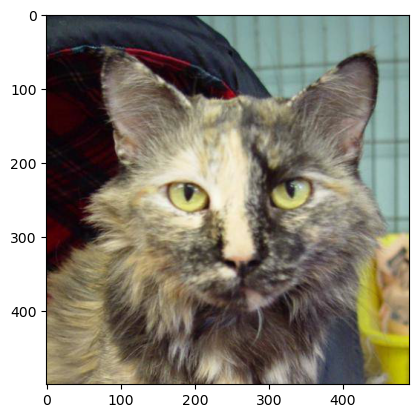

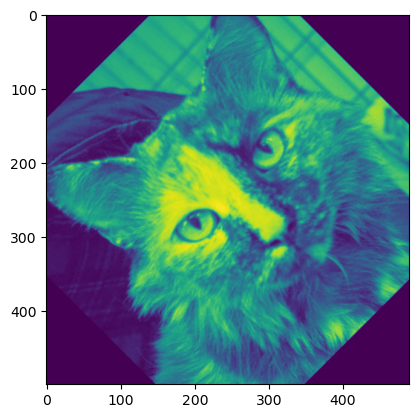

In [12]:
import matplotlib.pyplot as plt
img = plt.imread("/kaggle/working/AugmentedImage.jpg")
img2 = plt.imread("/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.10.jpg")
plt.imshow(img2)
plt.show()
plt.imshow(img)
plt.show()

In [13]:
img = cv2.imread("/kaggle/working/AugmentedImage.jpg")
img2 = cv2.imread("/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.10.jpg")
image01 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
image02 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
image_comparision(image01, image02)

Mean Squared Error is 6684.135346357336
Structural Similarity Index Measure is: 0.15826905079654452


# Face Detection

In [14]:
import cv2
from PIL import Image
import numpy as np

**Reading image from URL and Resizing**

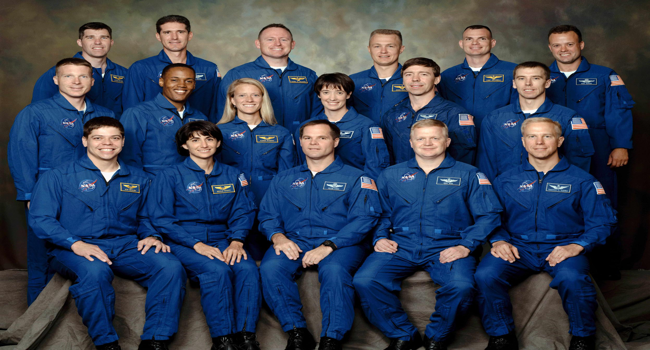

In [15]:
image = Image.open('/kaggle/input/astronauts/__results___2_0.png')
image = image.resize((650,350))
image_arr = np.array(image)
image

**Convert the image into grayscale**

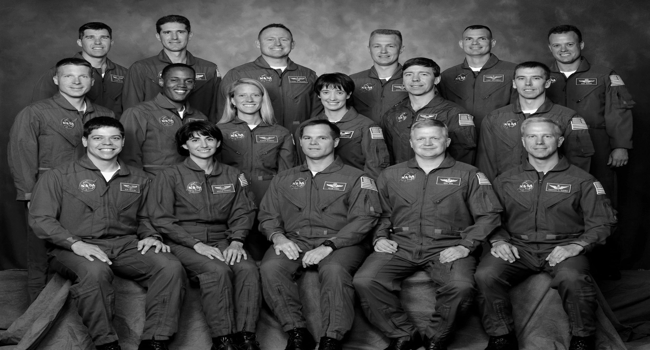

In [16]:
gray = cv2.cvtColor(image_arr, cv2.COLOR_BGR2GRAY)
Image.fromarray(gray)

**GaussianBlur to remove the noise from the image**

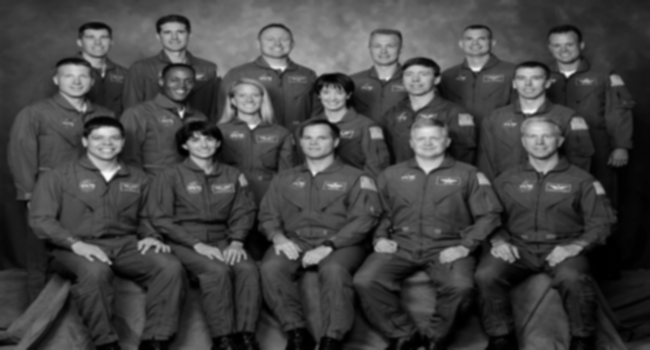

In [17]:
blur = cv2.GaussianBlur(gray,(5,5),0)
Image.fromarray(blur)

**Detecting face using haar cascade**

In [18]:
# Load the cascade
face_cascade = cv2.CascadeClassifier('/kaggle/input/haarcascade-frontalface-default/haarcascade_frontalface_default.xml')
# Detect faces
faces = face_cascade.detectMultiScale(blur, 1.1, 2)
faces

array([[157,  20,  34,  34],
       [548,  34,  30,  30],
       [368,  34,  33,  33],
       [459,  26,  34,  34],
       [ 80,  25,  34,  34],
       [260,  27,  33,  33],
       [401,  62,  30,  30],
       [ 58,  62,  35,  35],
       [165,  68,  31,  31],
       [511,  64,  37,  37],
       [319,  82,  28,  28],
       [234,  84,  31,  31],
       [297, 125,  35,  35],
       [408, 123,  39,  39],
       [ 86, 122,  41,  41],
       [499,  96,  59,  59],
       [520, 121,  40,  40]], dtype=int32)

**Draw a rectangle around detected faces**

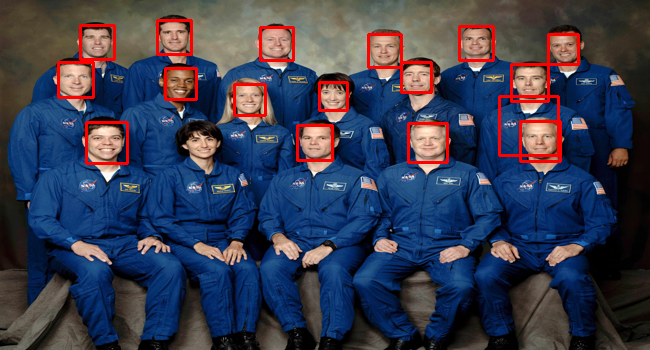

In [19]:
for (x, y, w, h) in faces:
    cv2.rectangle(image_arr, (x, y), (x+w, y+h), (255, 0, 0), 2)
Image.fromarray(image_arr)

**Average Blur, Gaussian Blur, Media Blur,Bilateral Filtering**

Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noise. It actually removes high frequency content (eg: noise, edges) from the image. So edges are blurred a little bit in this operation (there are also blurring techniques which don't blur the edges). OpenCV provides four main types of blurring techniques

**1. Averaging**

This is done by convolving an image with a normalized box filter. It simply takes the average of all the pixels under the kernel area and replaces the central element. This is done by the function cv.blur() or cv.boxFilter(). Check the docs for more details about the kernel. We should specify the width and height of the kernel. A 3x3 normalized box filter would look like the below:

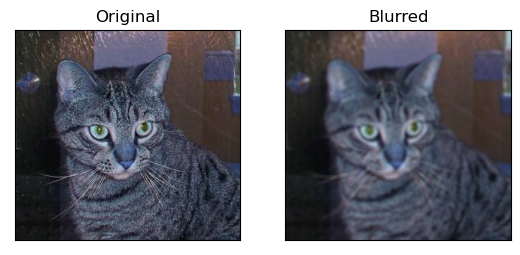

In [20]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.1.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"

blur = cv.blur(img,(5,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

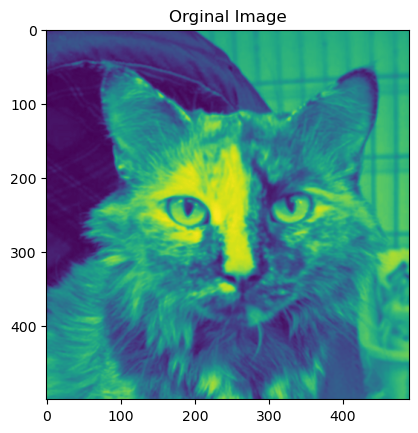

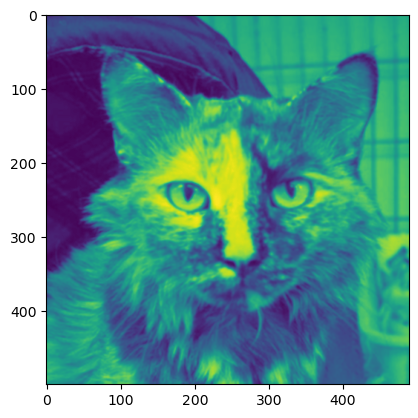

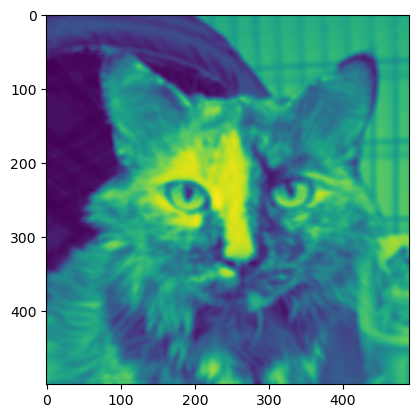

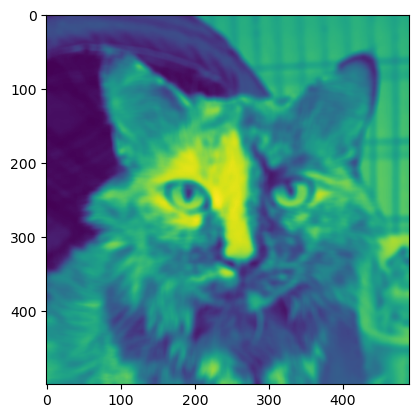

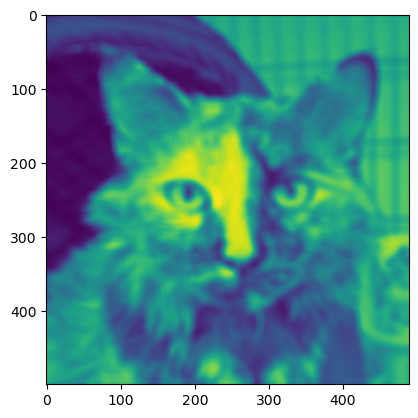

In [21]:
image01 = cv2.blur(image02, (3, 3))
image012 = cv2.blur(image02, (7, 7))
image013 = cv2.blur(image02, (9, 9))
image014 = cv2.blur(image02, (11, 11))

plt.imshow(image01)
plt.title("Orginal Image")
plt.show()
plt.imshow(image01)
plt.show()
plt.imshow(image012)
plt.show()
plt.imshow(image013)
plt.show()
plt.imshow(image014)
plt.show()

**2. Gaussian Blurring**

In this method, instead of a box filter, a Gaussian kernel is used. It is done with the function, cv.GaussianBlur(). We should specify the width and height of the kernel which should be positive and odd. We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as the same as sigmaX. If both are given as zeros, they are calculated from the kernel size. Gaussian blurring is highly effective in removing Gaussian noise from an image.

If you want, you can create a Gaussian kernel with the function, cv.getGaussianKernel().

The above code can be modified for Gaussian blurring:

blur = cv.GaussianBlur(img,(5,5),0)

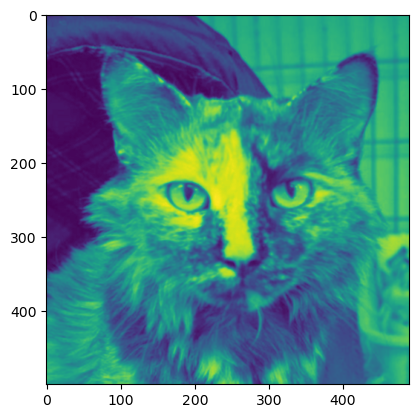

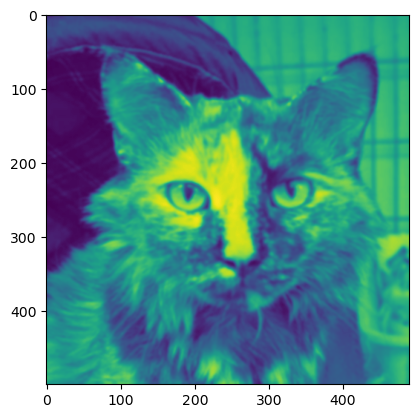

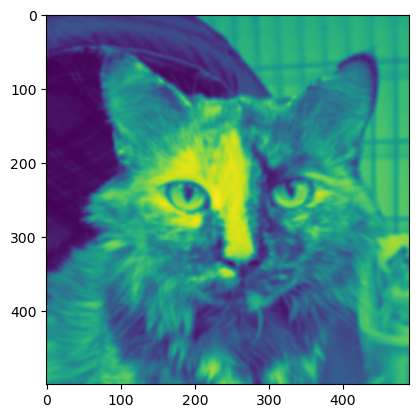

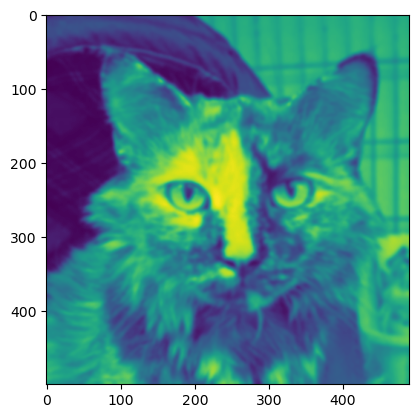

In [22]:
image01 = cv2.GaussianBlur(image02, (3, 3), 0)
image012 = cv2.GaussianBlur(image02, (7, 7), 0)
image013 = cv2.GaussianBlur(image02, (9, 9), 0)
image014 = cv2.GaussianBlur(image02, (11, 11), 0)

plt.imshow(image01)
plt.show()
plt.imshow(image012)
plt.show()
plt.imshow(image013)
plt.show()
plt.imshow(image014)
plt.show()

**3. Median Blurring**

Here, the function cv.medianBlur() takes the median of all the pixels under the kernel area and the central element is replaced with this median value. This is highly effective against salt-and-pepper noise in an image. Interestingly, in the above filters, the central element is a newly calculated value which may be a pixel value in the image or a new value. But in median blurring, the central element is always replaced by some pixel value in the image. It reduces the noise effectively. Its kernel size should be a positive odd integer.

In this demo, I added a 50% noise to our original image and applied median blurring. Check the result:

median = cv.medianBlur(img,5)

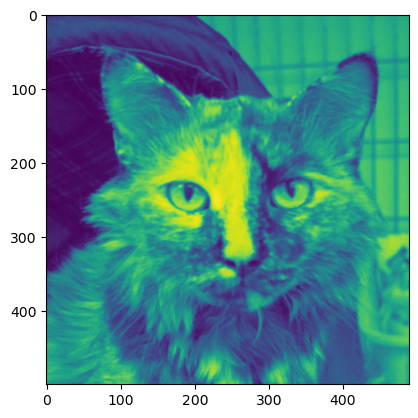

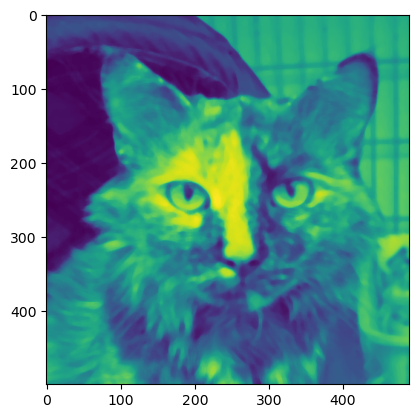

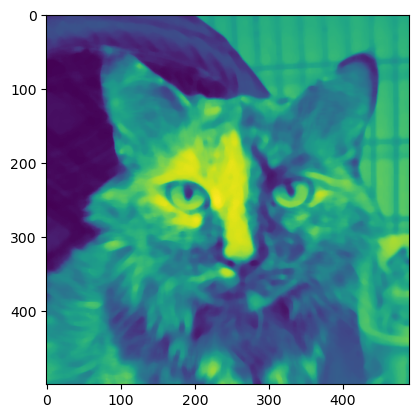

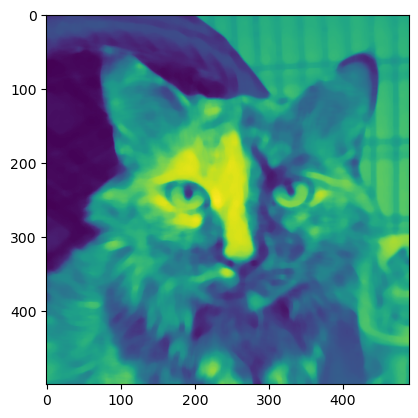

In [23]:
image01 = cv2.medianBlur(image02, 3)
image012 = cv2.medianBlur(image02, 7)
image013 = cv2.medianBlur(image02, 9)
image014 = cv2.medianBlur(image02, 11)

plt.imshow(image01)
plt.show()
plt.imshow(image012)
plt.show()
plt.imshow(image013)
plt.show()
plt.imshow(image014)
plt.show()

**4. Bilateral Filtering**

cv.bilateralFilter() is highly effective in noise removal while keeping edges sharp. But the operation is slower compared to other filters. We already saw that a Gaussian filter takes the neighbourhood around the pixel and finds its Gaussian weighted average. This Gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering. It doesn't consider whether pixels have almost the same intensity. It doesn't consider whether a pixel is an edge pixel or not. So it blurs the edges also, which we don't want to do.

Bilateral filtering also takes a Gaussian filter in space, but one more Gaussian filter which is a function of pixel difference. The Gaussian function of space makes sure that only nearby pixels are considered for blurring, while the Gaussian function of intensity difference makes sure that only those pixels with similar intensities to the central pixel are considered for blurring. So it preserves the edges since pixels at edges will have large intensity variation.

The below sample shows use of a bilateral filter (For details on arguments, visit docs).

blur = cv.bilateralFilter(img,9,75,75)

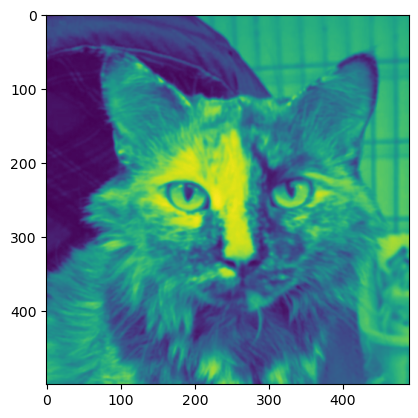

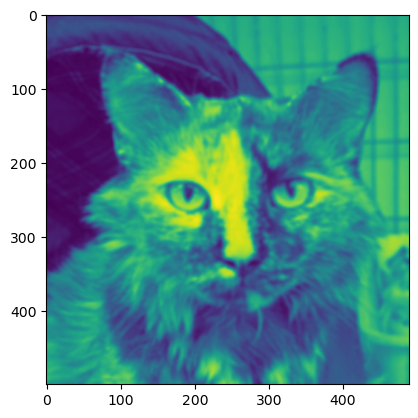

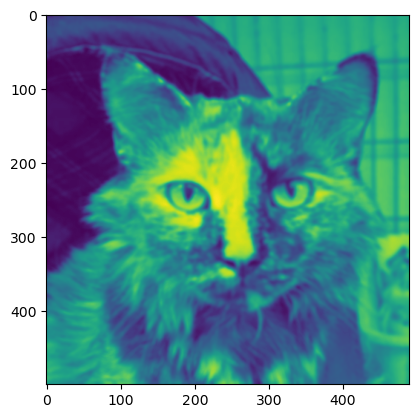

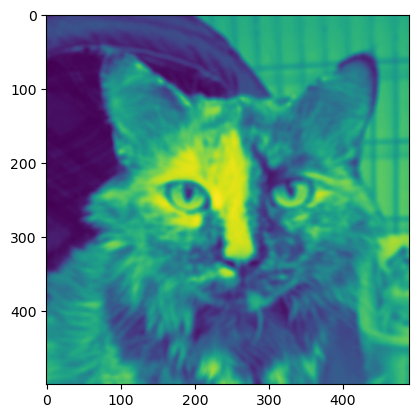

In [24]:
image01 = cv2.bilateralFilter(image02, 5,575,550)
image012 = cv2.bilateralFilter(image02, 6,675,675)
image013 = cv2.bilateralFilter(image02, 7,775,775)
image014 = cv2.bilateralFilter(image02, 8,875,875)

plt.imshow(image01)
plt.show()
plt.imshow(image012)
plt.show()
plt.imshow(image013)
plt.show()
plt.imshow(image014)
plt.show()